# Predicting Solar Flare Events Using Linear Regression

## Overview
This project aims to utilize linear regression in order to predict the likelihood of an occurrence of a solar flare given the specific characteristics of a particular sun region.

### Hypothesis
I hypothesize that employing the use of linear regression will be effective in predicting the likely amount of solar flares given the characteristics of a certain region on the sun.

### About the Data Set
I obtained this data set from the UCI Machine Learning Repository (Solar Flare Data Set) uploaded to the repository on 3/1/1989.  The data set is located at: http://archive.ics.uci.edu/ml/datasets/Solar+Flare. The data set contains the following variables.

1. Code for class (modified Zurich class)  
(A,B,C,D,E,F,H) 

2. Code for largest spot size              
(X,R,S,A,H,K) 

3. Code for spot distribution              
(X,O,I,C)

4. Activity 
(1 = reduced, 2 = unchanged)

5. Evolution            
(1 = decay, 2 = no growth,3 = growth) 

6. Previous 24 hour flare activity code               
(1 = nothing as big as an M1, 2 = one M1, 3 = more activity than one M1)

7. Historically-complex 
(1 = Yes, 2 = No)

8. Did region become historically complexon this pass across the sun's disk
(1 = yes, 2 = no) 

9. Area 
(1 = small, 2 = large)
 


### Instances/Variables to Drop

Originally the data set contain an attribute called "Area of the largest spot. We decided to drop that feature because all of the data was binary ones and that would not be benifical in training our algorithm.



## Library Imports / Versions

In [1]:
import pylab
import re
import  numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import confusion_matrix
from patsy import dmatrices, dmatrix
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import matplotlib
import sklearn
import patsy
print ("Python: ", sys.version)
print('Pandas: ', pd.__version__)
print("Numpy: ",np.__version__)
print ("Matplotlib: ", matplotlib.__version__)
print("Seaborn: ", sns.__version__)
print("SKLearn: ", sklearn.__version__)
print("Patsy: ",patsy.__version__)

Python:  3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]
Pandas:  0.20.1
Numpy:  1.12.1
Matplotlib:  2.0.2
Seaborn:  0.7.1
SKLearn:  0.18.1
Patsy:  0.4.1


### Load the Data Set

1066


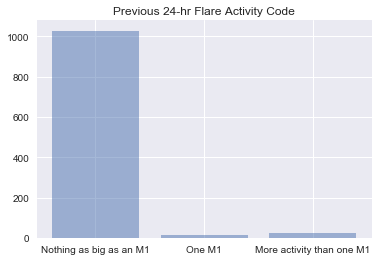

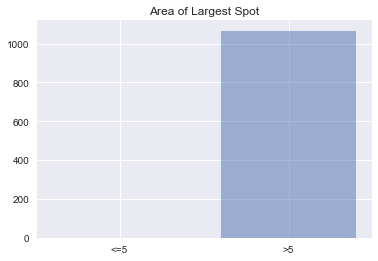

In [25]:
flares = open("flares.txt")
fcount = 0
for line in flares:
	fcount = fcount + 1
flares.close()
#Data lists
flaredata = []
#Modified Zurich class
zca = [0] * fcount
zcb = [0] * fcount
zcc = [0] * fcount
zcd = [0] * fcount
zce = [0] * fcount
zcf = [0] * fcount
zch = [0] * fcount
flaredata.append(zca)
flaredata.append(zcb)
flaredata.append(zcc)
flaredata.append(zcd)
flaredata.append(zce)
flaredata.append(zcf)
flaredata.append(zch)
#Largest spot size
lssx = [0] * fcount
lssr = [0] * fcount
lsss = [0] * fcount
lssa = [0] * fcount
lssh = [0] * fcount
lssk = [0] * fcount
flaredata.append(lssx)
flaredata.append(lssr)
flaredata.append(lsss)
flaredata.append(lssa)
flaredata.append(lssh)
flaredata.append(lssk)
#Spot distribution
sdx = [0] * fcount
sdo = [0] * fcount
sdi = [0] * fcount
sdc = [0] * fcount
flaredata.append(sdx)
flaredata.append(sdo)
flaredata.append(sdi)
flaredata.append(sdc)
#Activity - 0=reduced, 1=unchanged
activity = [0] * fcount
flaredata.append(activity)
#Evolution
evod = [0] * fcount
evon = [0] * fcount
evog = [0] * fcount
flaredata.append(evod)
flaredata.append(evon)
flaredata.append(evog)
#Previous 24hr flare activity
pfacm1 = [0] * fcount
pfacm2 = [0] * fcount
pfacm3 = [0] * fcount
flaredata.append(pfacm1)
flaredata.append(pfacm2)
flaredata.append(pfacm3)
#Historically complex
histcomp = [0] * fcount
flaredata.append(histcomp)
#Did region become historically complex on this pass across the sun's disk? 0=no, 1=yes
bhcop = [0] * fcount
flaredata.append(bhcop)
#Area, 0=small, 1=large
flarearea = [0] * fcount
flaredata.append(flarearea)
#Area of largest spot, 0=(<=5) 1=(>5)
lspots = [0] * fcount
flaredata.append(lspots)

#Result set - flare count
flarecount = [0] * fcount
flaredata.append(flarecount)
#29 lists total, 28 without result set

#Populate data
flares = open("flares.txt")
findex = 0
testcount = 0
for line in flares:
	thisflare = re.split("\s+", line)
	#Zurich class
	if thisflare[0] == "A":
		zca[findex] = 1
	elif thisflare[0] == "B":
		zcb[findex] = 1
	elif thisflare[0] == "C":
		zcc[findex] = 1
	elif thisflare[0] == "D":
		zcd[findex] = 1
	elif thisflare[0] == "E":
		zce[findex] = 1
	elif thisflare[0] == "F":
		zcf[findex] = 1
	elif thisflare[0] == "H":
		zch[findex] = 1
    #Spot size
	if thisflare[1] == "X":
		lssx[findex] = 1
	elif thisflare[1] == "R":
		lssr[findex] = 1
	elif thisflare[1] == "S":
		lsss[findex] = 1
	elif thisflare[1] == "A":
		lssa[findex] = 1
	elif thisflare[1] == "H":
		lssh[findex] = 1
	elif thisflare[1] == "K":
		lssk[findex] = 1
    #Spot distribution
	if thisflare[2] == "X":
		sdx[findex] = 1
	elif thisflare[2] == "O":
		sdo[findex] = 1
	elif thisflare[2] == "I":
		sdi[findex] = 1
	elif thisflare[2] == "C":
		sdc[findex] = 1
    #Activity
	if thisflare[3] == "2":
		activity[findex] = 1
    #Evolution
	if thisflare[4] == "1":
		evod[findex] = 1
	elif thisflare[4] == "2":
		evon[findex] = 1
	elif thisflare[4] == "3":
		evog[findex] = 1
    #Previous activity
	if thisflare[5] == "1":
		pfacm1[findex] = 1
	elif thisflare[5] == "2":
		pfacm2[findex] = 1
	elif thisflare[5] == "3":
		pfacm3[findex] = 1
	#Historically complex
	if thisflare[6] == "2":
		histcomp[findex] = 1
    #Became historically complex?
	if thisflare[7] == "2":
		bhcop[findex] = 1
    #Area
	if thisflare[8] == "2":
		flarearea[findex] = 1
    #Largest spot
	if thisflare[9] == "2":
		lspots[findex] = 1
	#Results
	if int(thisflare[10]) > 0:
		flarecount[findex] = flarecount[findex] + int(thisflare[9])
	if int(thisflare[11]) > 0:
		flarecount[findex] = flarecount[findex] + int(thisflare[10])
	if int(thisflare[12]) > 0:
		flarecount[findex] = flarecount[findex] + int(thisflare[11])
	#Iterate counter
	findex = findex + 1
	testcount = testcount + 1
print(testcount)



#Get count
def getCount(li):
	c = 0
	for i in li:
		if i == 1:
			c = c + 1
	return c
#Plot Zurich class
zyax = [getCount(zca), getCount(zcb), getCount(zcc), getCount(zcd), getCount(zce), getCount(zcf), getCount(zch)]
zxax = np.arange(7)
plt.bar(zxax, zyax, align="center", alpha=0.5)
plt.title("Zurich Class Frequencies")
plt.xticks(zxax, ("A", "B", "C", "D", "E", "F", "H"))
#plt.show()

#Plot Largest Spot Size
plt.cla()
lsyax = [getCount(lssx), getCount(lssr), getCount(lsss), getCount(lssa), getCount(lssh), getCount(lssk)]
lsxax = np.arange(6)
plt.bar(lsxax, lsyax, align="center", alpha=0.5)
plt.title("Largest Spot Size")
plt.xticks(zxax, ("X", "R", "S", "A", "H", "K"))
#plt.show()

#Plot Spot Distribution
plt.cla()
sdyax = [getCount(sdx), getCount(sdo), getCount(sdi), getCount(sdc)]
sdxax = np.arange(4)
plt.bar(sdxax, sdyax, align="center", alpha=0.5)
plt.title("Spot Distribution Class")
plt.xticks(sdxax, ("X", "O", "I", "C"))
#plt.show()

#Plot Activity
plt.cla()
actyax = [getCount(activity), (1066 - getCount(activity))]
actxax = np.arange(2)
plt.bar(actxax, actyax, align="center", alpha=0.5)
plt.title("Activity")
plt.xticks(actxax, ("Activity", "No Activity"))
#plt.show()

#Plot Evolution
plt.cla()
evoyax = [getCount(evod), getCount(evon), getCount(evog)]
evoxax = np.arange(3)
plt.bar(evoxax, evoyax, align="center", alpha=0.5)
plt.title("Evolution")
plt.xticks(evoxax, ("Decay", "No Growth", "Growth"))
#plt.show()

#Plot Previous 24-hr Flare Activity Code
plt.cla()
pfacyax = [getCount(pfacm1), getCount(pfacm2), getCount(pfacm3)]
pfacxax = np.arange(3)
plt.bar(pfacxax, pfacyax, align="center", alpha=0.5)
plt.title("Previous 24-hr Flare Activity Code")
plt.xticks(pfacxax, ("Nothing as big as an M1", "One M1", "More activity than one M1"))
plt.show()

#Plot Historically Complex
plt.cla()
hcyax = [getCount(histcomp), (1066 - getCount(histcomp))]
hcxax = np.arange(2)
plt.bar(hcxax, hcyax, align="center", alpha=0.5)
plt.title("Historically Complex")
plt.xticks(hcxax, ("Yes", "No"))
#plt.show()

#Plot Became Historically Complex
plt.cla()
bhyax = [getCount(bhcop), (1066 - getCount(bhcop))]
bhxax = np.arange(2)
plt.bar(bhxax, bhyax, align="center", alpha=0.5)
plt.title("Did area become historically complex on this pass?")
plt.xticks(bhxax, ("Yes", "No"))
#plt.show()

#Plot Area
plt.cla()
aryax = [getCount(flarearea), (1066 - getCount(flarearea))]
arxax = np.arange(2)
plt.bar(arxax, aryax, align="center", alpha=0.5)
plt.title("Area")
plt.xticks(arxax, ("Small", "Large"))
#plt.show()

#Plot Largest Spot Area - deprecated as everything is <=5
plt.cla()
spyax = [getCount(lspots), (1066 - getCount(lspots))]
spxax = np.arange(2)
plt.bar(spxax, spyax, align="center", alpha=0.5)
plt.title("Area of Largest Spot")
plt.xticks(spxax, ("<=5", ">5"))
plt.show()
#print(lspots)

## Exploratory Analysis

### Statistical Summary
First, let's summarize all of the variables to get sense of the clustering and spread on the continuous variables and the proportions for categorical variables.

In [9]:
pddata = pd.read_csv('flares.txt', sep = " ", header = None)

Looks like we have some missing values for horsepower. Since there are so few, we will probably drop these later. Area if 

Let's look at the frequency counts of our categorical variables.

In [28]:
d['dummy']=0
cylinders = d[['cylinders','dummy']].groupby(d.cylinders).count()
cylinders.dummy=np.round(cylinders.cylinders/len(d),2)*100

model_year = d[['model_year','dummy']].groupby(d.model_year).count()
model_year.dummy=np.round(model_year.model_year/len(d),2)*100

origin = d[['origin','dummy']].groupby(d.origin).count()
origin.dummy=np.round(origin.origin/len(d),2)*100

print(cylinders, '\n\n', model_year, '\n\n', origin)

           cylinders  dummy
cylinders                  
3                  4    1.0
4                204   51.0
5                  3    1.0
6                 84   21.0
8                103   26.0 

             model_year  dummy
model_year                   
70                  29    7.0
71                  28    7.0
72                  28    7.0
73                  40   10.0
74                  27    7.0
75                  30    8.0
76                  34    9.0
77                  28    7.0
78                  36    9.0
79                  29    7.0
80                  29    7.0
81                  29    7.0
82                  31    8.0 

         origin  dummy
origin               
1          249   63.0
2           70   18.0
3           79   20.0


Cylinders is not balanced with very few examples for 3/5 cylinder cars.  Not a surprise as this is an unusual configuration for cars. Model year has 13 years worth of data evenly balanced except for 1973 which has 40 instances. Finally, the origin is not balanced, there are many more examples for 1 than 2 and 3.

### Graphical Analysis

Next, lets plot the independent continuous variables against the dependent variable in some scatter plots to get a sense of the relationships.

In [6]:
#Get count
def getCount(li):
	c = 0
	for i in li:
		if i == 1:
			c = c + 1
	return c
#Plot Zurich class
zyax = [getCount(zca), getCount(zcb), getCount(zcc), getCount(zcd), getCount(zce), getCount(zcf), getCount(zch)]
zxax = np.arange(7)
plt.bar(zxax, zyax, align="center", alpha=0.5)
plt.title("Zurich Class Frequencies")
plt.xticks(zxax, ("A", "B", "C", "D", "E", "F", "H"))
#plt.show()



NameError: name 'zcb' is not defined

In [ ]:
#Plot Largest Spot Size
plt.cla()
lsyax = [getCount(lssx), getCount(lssr), getCount(lsss), getCount(lssa), getCount(lssh), getCount(lssk)]
lsxax = np.arange(7)
plt.bar(zxax, zyax, align="center", alpha=0.5)
plt.title("Largest Spot Size")
plt.xticks(zxax, ("X", "R", "S", "A", "H", "K"))
#plt.show()

#Plot Spot Distribution
plt.cla()
sdyax = [getCount(sdx), getCount(sdo), getCount(sdi), getCount(sdc)]
sdxax = np.arange(4)
plt.bar(sdxax, sdyax, align="center", alpha=0.5)
plt.title("Spot Distribution Class")
plt.xticks(sdxax, ("X", "O", "I", "C"))
#plt.show()

#Plot Activity
plt.cla()
actyax = [getCount(activity), (1066 - getCount(activity))]
actxax = np.arange(2)
plt.bar(actxax, actyax, align="center", alpha=0.5)
plt.title("Activity")
plt.xticks(actxax, ("Activity", "No Activity"))
plt.show()

#Plot Evolution
plt.cla()
evoyax = [getCount(evod), getCount(evon), getCount(evog)]
evoxax = np.arange(3)
plt.bar(evoxax, evoyax, align="center", alpha=0.5)
plt.title("Evolution")
plt.xticks(evoxax, ("Decay", "No Growth", "Growth"))
#plt.show()

#Plot Previous 24-hr Flare Activity Code
plt.cla()
pfacyax = [getCount(pfacm1), getCount(pfacm2), getCount(pfacm3)]
pfacxax = np.arange(3)
plt.bar(pfacxax, pfacyax, align="center", alpha=0.5)
plt.title("Previous 24-hr Flare Activity Code")
plt.xticks(pfacxax, ("Nothing as big as an M1", "One M1", "More activity than one M1"))
plt.show()

#Plot Historically Complex
plt.cla()
hcyax = [getCount(histcomp), (1066 - getCount(histcomp))]
hcxax = np.arange(2)
plt.bar(hcxax, hcyax, align="center", alpha=0.5)
plt.title("Historically Complex")
plt.xticks(hcxax, ("Yes", "No"))
#plt.show()

#Plot Became Historically Complex
plt.cla()
bhyax = [getCount(bhcop), (1066 - getCount(bhcop))]
bhxax = np.arange(2)
plt.bar(bhxax, bhyax, align="center", alpha=0.5)
plt.title("Did area become historically complex on this pass?")
plt.xticks(bhxax, ("Yes", "No"))
#plt.show()

#Plot Area
plt.cla()
aryax = [getCount(flarearea), (1066 - getCount(flarearea))]
arxax = np.arange(2)
plt.bar(arxax, aryax, align="center", alpha=0.5)
plt.title("Area")
plt.xticks(arxax, ("Small", "Large"))
#plt.show()

#Plot Largest Spot Area - deprecated as everything is <=5
#plt.cla()
#spyax = [getCount(lspots), (1066 - getCount(lspots))]
#spxax = np.arange(2)
#plt.bar(spxax, spyax, align="center", alpha=0.5)
#plt.title("Area of Largest Spot")
#plt.xticks(spxax, ("<=5", ">5"))
#plt.show()
#print(lspots)

These plots show there appears to be a negative relationship between displacement, horsepower, and weight with regards to MPG. In other words, as they go up, the MPG goes down. However, the relationship does not look strictly linear - more like a curve.  

The relationship between acceleration and MPG is less clear. It could be a positive linear relationship, but the spread is wide, therefore that may not be the case.

Let's also look at the shape of these variables.

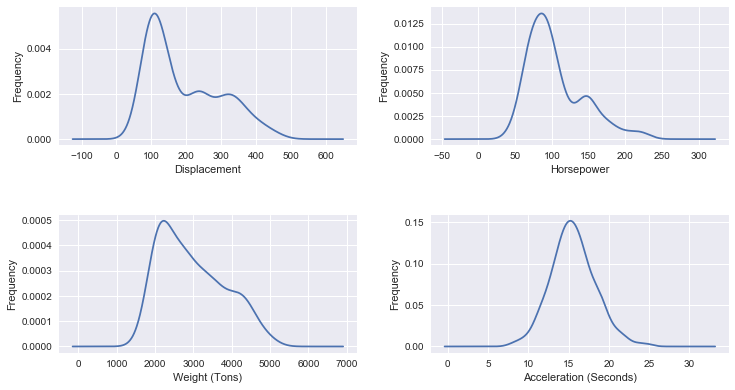

In [30]:
fig = plt.figure(figsize=(12,6))

fig.subplots_adjust(wspace=0.25, hspace=0.50, left=0.125, right=0.9, top=0.9, bottom=0.1)

ax1 = fig.add_subplot(221)
d.displacement.plot(kind="kde")
ax1.set_xlabel("Displacement")
ax1.set_ylabel("Frequency")

ax2 = fig.add_subplot(222)
d.horsepower.plot(kind="kde")
ax2.set_xlabel("Horsepower")
ax2.set_ylabel("Frequency")

ax3 = fig.add_subplot(223)
d.weight.plot(kind="kde")
ax3.set_xlabel("Weight (Tons)")
ax3.set_ylabel("Frequency")

ax4 =fig.add_subplot(224)
d.acceleration.plot(kind="kde")
ax4.set_xlabel("Acceleration (Seconds)")
ax4.set_ylabel("Frequency")

plt.show()

The curves for these variables indicate that except for **acceleration** they don't appear to be exactly normally distributed, but they are close enough that we will consider them normally distributed for our purposes.

We also want to look at the frequency graphs of the categorical data to get a better sense of what they look like.

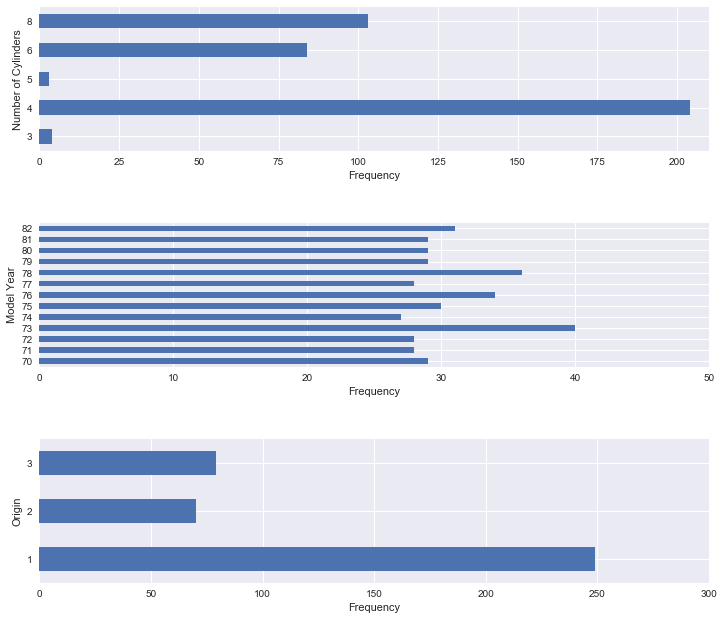

In [31]:
fig = plt.figure(figsize=(12,10))

fig.subplots_adjust(wspace=0.25, hspace=0.50, left=0.125, right=0.9, top=0.9, bottom=0.1)

ax1 = fig.add_subplot(311)
cylinders.cylinders.plot(kind="barh")
ax1.set_ylabel("Number of Cylinders")
ax1.set_xlabel("Frequency")
ax1.set_xlim(0,210)

ax2 = fig.add_subplot(312)
model_year.model_year.plot(kind="barh")
ax2.set_ylabel("Model Year")
ax2.set_xlabel("Frequency")
ax2.set_xlim(0,50)

ax3 = fig.add_subplot(313)
origin.origin.plot(kind="barh")
ax3.set_ylabel("Origin")
ax3.set_xlabel("Frequency")
ax3.set_xlim(0,300)

plt.show()

This is just a graphical view of the text data we looked at earlier. This doesn't really provide any new insight, therefore wasn't necessary to do.

### Additional Exploratory Analysis

Let's look at the correlation matrix to see if it supports our Graphical Analysis.

In [32]:
d.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg,dummy
cylinders,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543,-0.775396,NaN
displacement,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409,-0.804203,NaN
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.778427,NaN
weight,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024,-0.831741,NaN
acceleration,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873,0.420289,NaN
model_year,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662,0.579267,NaN
origin,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000,0.563450,NaN
mpg,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450,1.000000,NaN
dummy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The correlation matrix supports our scatterplots. For a 1 unit increase in displacement, horsepower, or weight, the MPG goes down.  And, there is a positive correlation between acceleration and MPG (ignore the categorical variables).

## Functions
* **my_lr: ** trains the model, displays the coefficients and intercept as well as display the R-squared value and the mean squared error for the validation and training sets.  Finally it will plot the residuals of the test for further graphical analysis.
* **prep_data: ** takes the data set with only continuous variablesas input and returns train, validate and test sets for the features/target variable.
* **prep_data_all: ** takes complete data set as input and returns train,validate and test sets for the features/target.
* **normalize_data: ** takes data set with only continuous variables as input and normalizes them.

In [55]:
def my_lr(X_train,Y_train,X_validate, Y_validate, X_test,Y_test, experiment, replicate):
    regr = linear_model.LinearRegression() #LR Object
    regr.fit(X_train,Y_train) #Fit the model
    print("===================================")
    print(experiment, replicate)
    print("===================================")
    print('Model Coefficients w\Intercept: \n', regr.intercept_, regr.coef_,"\n") #Print the coefficients    
    
    print("Validate")
    print("===================================")
    print('Coefficient of Determination: %.2f' % regr.score(X_validate, Y_validate))  #Print the variance score ($$r^2$$)
    print("Mean squared error: %.2f" % np.mean((regr.predict(X_validate) - Y_validate) ** 2))
    
    print("\nTest")
    print("===================================")
    print('Coefficient of Determination: %.2f' % regr.score(X_test, Y_test))  #Print the variance score ($$r^2$$)
    print("Mean squared error: %.2f" % np.mean((regr.predict(X_test) - Y_test) ** 2))
    
    
    fitted_values= regr.predict(X_test) #Make the predictions
    #print("Predictions: ", fitted_values) # used for debugging and evaluation
    residuals=fitted_values - Y_test #Subtract observed value from predictions (y-hat)-y
    
    #Plot the fitted values against the residuals for the test
    plt.scatter(fitted_values,residuals, marker="o")
    plt.xlabel("Fitted Values")
    plt.ylabel("Residuals")
    plt.xlim([np.min(fitted_values)-1,np.max(fitted_values)+1])
    x1=np.linspace(np.min(fitted_values)-1, np.max(fitted_values)+1)
    y1=np.zeros(len(x1))
    plt.plot(x1, y1, color="red")
    plt.show()

def prep_data(d,train):
    test_size = (100.0 - train)/100
    d.columns=("x1","x2","x3","x4","y")
    train, temp = train_test_split(d, test_size =test_size )
    validate, test = train_test_split(temp, test_size=.50)


    X_train=train[['x1','x2','x3','x4']]
    Y_train=train[['y']]

    X_validate=validate[['x1','x2','x3','x4']]
    Y_validate=validate[['y']]

    X_test=test[['x1','x2','x3','x4']]
    Y_test=test[['y']]
    
    return X_train, Y_train, X_validate, Y_validate, X_test, Y_test

def prep_data_all(d,train):
    test_size = (100.0 - train)/100
    train, temp = train_test_split(d, test_size =test_size )
    validate, test = train_test_split(temp, test_size=.50)

    columns = d.columns
    mask = np.ones(columns.shape, dtype=bool)
    i=25
    mask[i]=0

    X_train=train[columns[mask]]
    Y_train=train[['y']]

    X_validate=validate[columns[mask]]
    Y_validate=validate[['y']]

    X_test=test[columns[mask]]
    Y_test=test[['y']]
    
    return X_train, Y_train, X_validate, Y_validate, X_test, Y_test

def normalize_data(X_train, Y_train, X_validate, Y_validate, X_test, Y_test):
    X_train_normed = (X_train-X_train.mean())/X_train.std()
    Y_train_normed = (Y_train-Y_train.mean())/Y_train.std()

    X_validate_normed = (X_validate-X_train.mean())/X_train.std()
    Y_validate_normed = (Y_validate-Y_train.mean())/Y_train.std()

    X_test_normed = (X_test-X_train.mean())/X_train.std()
    Y_test_normed = (Y_test-Y_train.mean())/Y_train.std()
    
    return X_train_normed, Y_train_normed, X_validate_normed, Y_validate_normed, X_test_normed, Y_test_normed

## Data Removal
Drop the instances/variables we don't need or can't use.

In [56]:
d=d.dropna(axis=0, how='any')  # Drop the blanks

# Drop multi-valued discrete data columns
d.drop(['cylinders','model_year','origin','dummy'],inplace=True,axis=1) 

ValueError: labels ['cylinders' 'model_year' 'origin' 'dummy'] not contained in axis

In [57]:
d.columns

Index(['x1', 'x2', 'x3', 'x4', 'y'], dtype='object')

## Preparation of the variables

We need to divide the data into several sets:
* **X_train** - Independent variables (features) used for training
* **Y_train** - Dependent variable (target) used for training
* **X_validate** - Independent variables (features) used for adjusting the model parameters
* **Y_validate** - Dependent variable (target) used for adjusting the model parameters
* **X_test** - Independing variables (features) used for testing the performance of the final model
* **Y_test** - Dependent variable (target) use for testing the performance of the final model

I am using the train_test_split function from the sklearn.model_selection library twice. Once to get the training set, then another time to divide the remaining data into validation and testing datasets.

In [58]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,8)

I can also normalize my values as another way to prep the data.  Below is an example how to do this, but I will do it later in the experiments one by one.

In [59]:
X_train_normed, Y_train_normed, X_validate_normed, Y_validate_normed, X_test_normed, Y_test_normed = normalize_data(X_train, Y_train, X_validate, Y_validate, X_test, Y_test)

## My Model - Linear Regression
Since this is an example notebook, I am not actually coding the Linear Regression Model myself. In your projects, this is where you would include your code to implement your algorithm. You may also put some or all of your implementation in the Functions section as long as it is clear where I can find it.

## Experiment One - Linear Regression all variables
This run will include all of the independent variables with unnormalized values.

Experiment 1 Replicate 1
Model Coefficients w\Intercept: 
 [ 44.07939326] [[-0.0057032  -0.04959351 -0.00507307  0.04716263]] 

Validate
Coefficient of Determination: 0.58
Mean squared error: 19.25

Test
Coefficient of Determination: 0.70
Mean squared error: 25.37


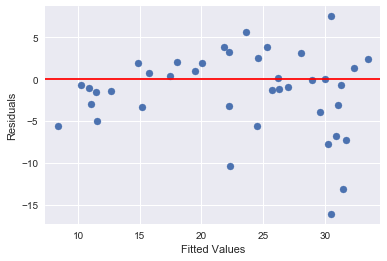

In [66]:
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 1","Replicate 1")

Experiment 1 Replicate 2
Model Coefficients w\Intercept: 
 [ 48.1864818] [[-0.00809207 -0.06256325 -0.00447291 -0.20524705]] 

Validate
Coefficient of Determination: 0.57
Mean squared error: 22.11

Test
Coefficient of Determination: 0.73
Mean squared error: 17.01


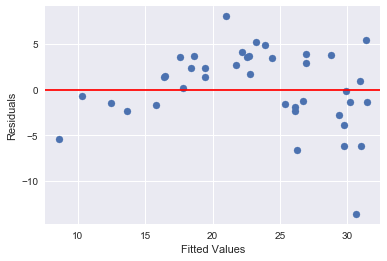

In [61]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,80)
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 1","Replicate 2")

Experiment 1 Replicate 3
Model Coefficients w\Intercept: 
 [ 46.30690056] [[-0.01112645 -0.04337804 -0.00480567 -0.12612376]] 

Validate
Coefficient of Determination: 0.78
Mean squared error: 13.43

Test
Coefficient of Determination: 0.66
Mean squared error: 23.98


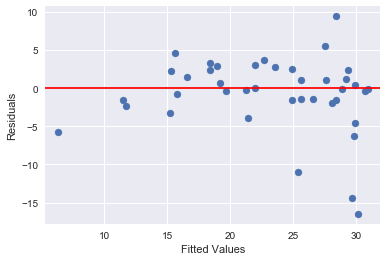

In [62]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,80)
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 1","Replicate 3")

The lowest MSE was 17.01 with an r-squared of .73.  OK, performance, but still significant instability in the prediction.

## Experiment Two- Linear Regression all variables (Normalized)
Sometimes you can get better performance by normalizing the variables before you run the model. We are going to do this to see if we get any improvement in the model.

Experiment 2 Replicate 1
Model Coefficients w\Intercept: 
 [ -2.85138317e-16] [[-0.15872188 -0.18422498 -0.52443884 -0.00754182]] 

Validate
Coefficient of Determination: 0.71
Mean squared error: 0.26

Test
Coefficient of Determination: 0.71
Mean squared error: 0.27


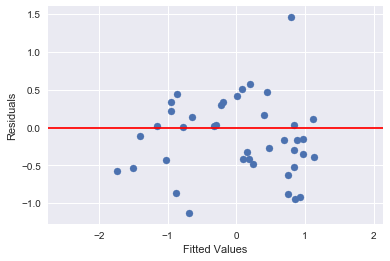

In [67]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,80)
X_train_normed, Y_train_normed, X_validate_normed, Y_validate_normed, X_test_normed, Y_test_normed = normalize_data(X_train, Y_train, X_validate, Y_validate, X_test, Y_test)
my_lr(X_train_normed,Y_train_normed,X_validate_normed,Y_validate_normed,X_test_normed,Y_test_normed,"Experiment 2","Replicate 1")

Experiment 2 Replicate 2
Model Coefficients w\Intercept: 
 [ -4.08277908e-16] [[-0.10608603 -0.12749682 -0.63212038 -0.00124752]] 

Validate
Coefficient of Determination: 0.72
Mean squared error: 0.33

Test
Coefficient of Determination: 0.59
Mean squared error: 0.42


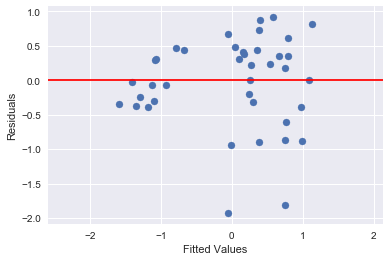

In [68]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,80)
X_train_normed, Y_train_normed, X_validate_normed, Y_validate_normed, X_test_normed, Y_test_normed = normalize_data(X_train, Y_train, X_validate, Y_validate, X_test, Y_test)
my_lr(X_train_normed,Y_train_normed,X_validate_normed,Y_validate_normed,X_test_normed,Y_test_normed,"Experiment 2","Replicate 2")

Experiment 2 Replicate 3
Model Coefficients w\Intercept: 
 [ -2.92279557e-16] [[-0.13191826 -0.21783462 -0.52953377 -0.03817059]] 

Validate
Coefficient of Determination: 0.75
Mean squared error: 0.17

Test
Coefficient of Determination: 0.78
Mean squared error: 0.20


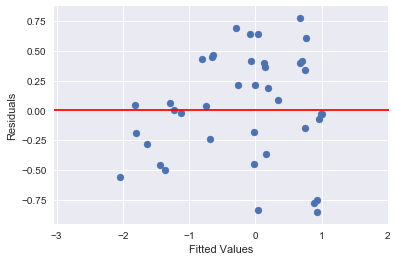

In [69]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,80)
X_train_normed, Y_train_normed, X_validate_normed, Y_validate_normed, X_test_normed, Y_test_normed = normalize_data(X_train, Y_train, X_validate, Y_validate, X_test, Y_test)
my_lr(X_train_normed,Y_train_normed,X_validate_normed,Y_validate_normed,X_test_normed,Y_test_normed,"Experiment 2","Replicate 3")

The last replicate provided an r-squared of 0.78, better than the best in our last experiment, but still a weak predictor.

## Experiment Three - Linear Regression with all variables, but split 70/15/15
Trying this with only the independent variables unnormalized, but with a different split for train, validate and test

Experiment 3 Replicate 1
Model Coefficients w\Intercept: 
 [ 46.12038746] [[-0.00548349 -0.04206509 -0.005542   -0.0464708 ]] 

Validate
Coefficient of Determination: 0.75
Mean squared error: 14.78

Test
Coefficient of Determination: 0.67
Mean squared error: 19.14


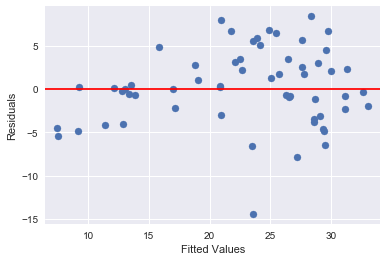

In [70]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 3","Replicate 1")

Experiment 3 Replicate 2
Model Coefficients w\Intercept: 
 [ 45.47013637] [[-0.01346728 -0.03754137 -0.00448653 -0.13830099]] 

Validate
Coefficient of Determination: 0.62
Mean squared error: 23.61

Test
Coefficient of Determination: 0.77
Mean squared error: 15.19


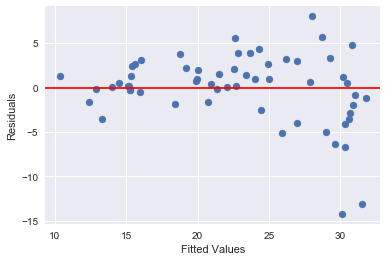

In [71]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 3","Replicate 2")

Experiment 3 Replicate 3
Model Coefficients w\Intercept: 
 [ 44.49812662] [[-0.01002452 -0.03605192 -0.00501716 -0.03239604]] 

Validate
Coefficient of Determination: 0.76
Mean squared error: 14.05

Test
Coefficient of Determination: 0.70
Mean squared error: 17.16


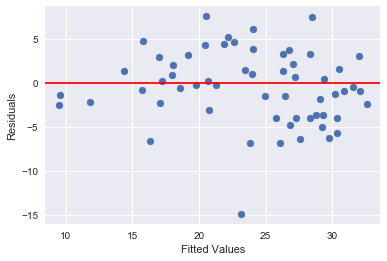

In [72]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 3","Replicate 3")

Highest r-squared is 0.75. Provides about the same performance as our previous experiments.

## Experiment Four - Linear Regression with all normalized variables, but split 70/15/15
Trying this with only the independent variables normalized, but with a different split for train, validate and test

Experiment 4 Replicate 1
Model Coefficients w\Intercept: 
 [  1.13846604e-16] [[ -5.11338452e-02  -2.20202163e-01  -6.00881266e-01   1.26649144e-04]] 

Validate
Coefficient of Determination: 0.68
Mean squared error: 0.32

Test
Coefficient of Determination: 0.67
Mean squared error: 0.27


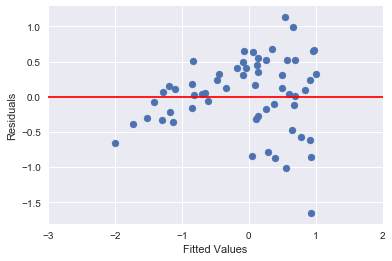

In [73]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
X_train_normed, Y_train_normed, X_validate_normed, Y_validate_normed, X_test_normed, Y_test_normed = normalize_data(X_train, Y_train, X_validate, Y_validate, X_test, Y_test)
my_lr(X_train_normed,Y_train_normed,X_validate_normed,Y_validate_normed,X_test_normed,Y_test_normed,"Experiment 4","Replicate 1")

Experiment 4 Replicate 2
Model Coefficients w\Intercept: 
 [ -1.11412847e-15] [[-0.02687148 -0.25932072 -0.58824317 -0.02392258]] 

Validate
Coefficient of Determination: 0.65
Mean squared error: 0.40

Test
Coefficient of Determination: 0.76
Mean squared error: 0.28


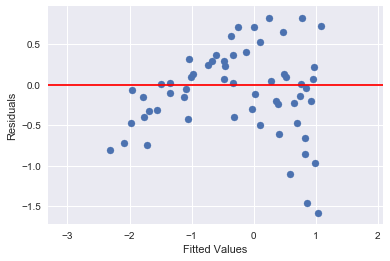

In [74]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
X_train_normed, Y_train_normed, X_validate_normed, Y_validate_normed, X_test_normed, Y_test_normed = normalize_data(X_train, Y_train, X_validate, Y_validate, X_test, Y_test)
my_lr(X_train_normed,Y_train_normed,X_validate_normed,Y_validate_normed,X_test_normed,Y_test_normed,"Experiment 4","Replicate 2")

Experiment 4 Replicate 3
Model Coefficients w\Intercept: 
 [ -5.93274512e-16] [[-0.12458138 -0.20467692 -0.56230923 -0.01082858]] 

Validate
Coefficient of Determination: 0.61
Mean squared error: 0.38

Test
Coefficient of Determination: 0.62
Mean squared error: 0.28


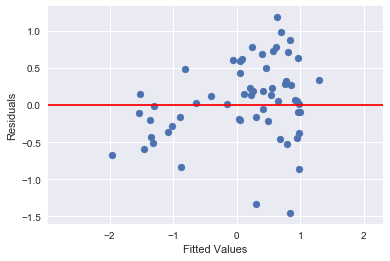

In [75]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
X_train_normed, Y_train_normed, X_validate_normed, Y_validate_normed, X_test_normed, Y_test_normed = normalize_data(X_train, Y_train, X_validate, Y_validate, X_test, Y_test)
my_lr(X_train_normed,Y_train_normed,X_validate_normed,Y_validate_normed,X_test_normed,Y_test_normed,"Experiment 4","Replicate 3")

Best r-squared was 0.76, still consistent with previous experiments.

## Experiment Five - Linear Regression with transform Displacement, Horsepower, and Weight
It looks like displacement, horsepower and weight might have a quadratic relationship to mpg.  Let's make this transformation to these variables (and drop acceleration) to see if that improves our model. 

Experiment 5 Replicate 1
Model Coefficients w\Intercept: 
 [ 64.66732888] [[-0.26122492 -1.02895008 -0.50765187]] 

Validate
Coefficient of Determination: 0.75
Mean squared error: 16.90

Test
Coefficient of Determination: 0.69
Mean squared error: 19.94


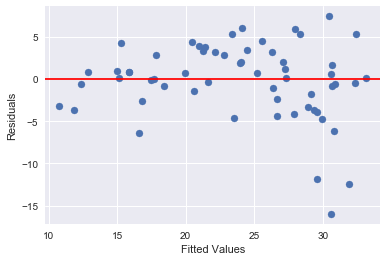

In [76]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
X_train = X_train.as_matrix()
X_train = np.sqrt(X_train[:,0:3])
X_validate = X_validate.as_matrix()
X_validate = np.sqrt(X_validate[:,0:3])
X_test = X_test.as_matrix()
X_test = np.sqrt(X_test[:,0:3])
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 5","Replicate 1")

Experiment 5 Replicate 2
Model Coefficients w\Intercept: 
 [ 64.89694886] [[-0.24008451 -0.99655445 -0.52450641]] 

Validate
Coefficient of Determination: 0.63
Mean squared error: 25.34

Test
Coefficient of Determination: 0.75
Mean squared error: 17.53


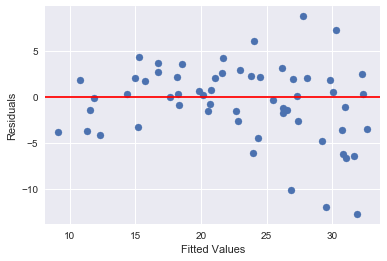

In [77]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
X_train = X_train.as_matrix()
X_train = np.sqrt(X_train[:,0:3])
X_validate = X_validate.as_matrix()
X_validate = np.sqrt(X_validate[:,0:3])
X_test = X_test.as_matrix()
X_test = np.sqrt(X_test[:,0:3])
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 5","Replicate 2")

Experiment 5 Replicate 3
Model Coefficients w\Intercept: 
 [ 67.92621862] [[-0.16385783 -1.0876045  -0.57914814]] 

Validate
Coefficient of Determination: 0.69
Mean squared error: 17.22

Test
Coefficient of Determination: 0.70
Mean squared error: 18.59


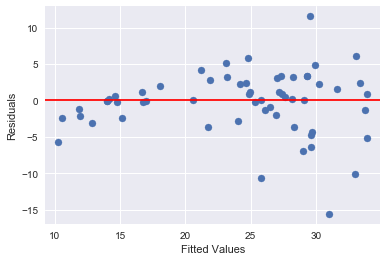

In [78]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
X_train = X_train.as_matrix()
X_train = np.sqrt(X_train[:,0:3])
X_validate = X_validate.as_matrix()
X_validate = np.sqrt(X_validate[:,0:3])
X_test = X_test.as_matrix()
X_test = np.sqrt(X_test[:,0:3])
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 5","Replicate 3")

Consistently higher r-squared values than our previous experiments. The transformation seemed to improved the model.

## Experiment Six - Linear Regression with transform Displacement, Horsepower, and Weight - and Acceleration (Unchanged)
It looks like displacement, horsepower and weight might have a quadratic relationship to mpg.  Let's make this transformation to these variables (and we'll leave acceleration the same) to see if that improves our model. 

Experiment 5 Replicate 1
Model Coefficients w\Intercept: 
 [ 67.23058306] [[-0.2468909  -1.72231523 -0.39267214 -0.11719014]] 

Validate
Coefficient of Determination: 0.69
Mean squared error: 17.11

Test
Coefficient of Determination: 0.71
Mean squared error: 19.29


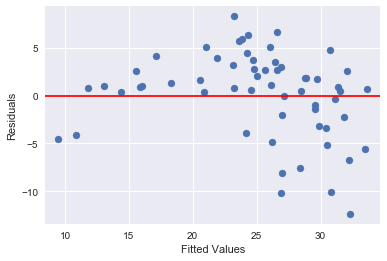

In [79]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
X_train = X_train.as_matrix()
X_train = np.hstack((np.sqrt(X_train[:,0:3]),X_train[:,3:4]))

X_validate = X_validate.as_matrix()
X_validate = np.hstack((np.sqrt(X_validate[:,0:3]),X_validate[:,3:4]))

X_test = X_test.as_matrix()
X_test = np.hstack((np.sqrt(X_test[:,0:3]),X_test[:,3:4]))

my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 6","Replicate 1")

Experiment 5 Replicate 2
Model Coefficients w\Intercept: 
 [ 67.66756665] [[-0.38206659 -1.19364766 -0.45720839 -0.15197986]] 

Validate
Coefficient of Determination: 0.79
Mean squared error: 12.56

Test
Coefficient of Determination: 0.74
Mean squared error: 19.38


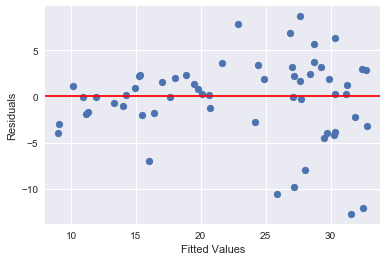

In [80]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
X_train = X_train.as_matrix()
X_train = np.hstack((np.sqrt(X_train[:,0:3]),X_train[:,3:4]))

X_validate = X_validate.as_matrix()
X_validate = np.hstack((np.sqrt(X_validate[:,0:3]),X_validate[:,3:4]))

X_test = X_test.as_matrix()
X_test = np.hstack((np.sqrt(X_test[:,0:3]),X_test[:,3:4]))

my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 6","Replicate 2")

Experiment 5 Replicate 3
Model Coefficients w\Intercept: 
 [ 66.75451667] [[-0.33538403 -1.39478292 -0.41415129 -0.16296443]] 

Validate
Coefficient of Determination: 0.72
Mean squared error: 20.49

Test
Coefficient of Determination: 0.76
Mean squared error: 14.55


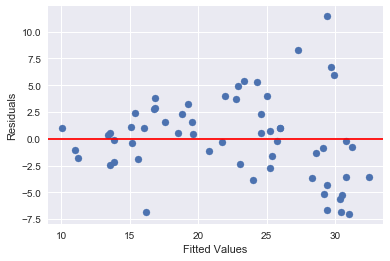

In [81]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data(d,70)
X_train = X_train.as_matrix()
X_train = np.hstack((np.sqrt(X_train[:,0:3]),X_train[:,3:4]))

X_validate = X_validate.as_matrix()
X_validate = np.hstack((np.sqrt(X_validate[:,0:3]),X_validate[:,3:4]))

X_test = X_test.as_matrix()
X_test = np.hstack((np.sqrt(X_test[:,0:3]),X_test[:,3:4]))

my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 6","Replicate 3")

Again, consistently better results than our previous experiments.  The tranformation on the three variables that showed a curved relationship improved the model.

## Experiment Seven - Linear Regression with transformed Displacement, Horsepower, and Weight, Acceleration (Unchanged) and categorical variables included.
Transforming displacement, horsepower and weight gave us our consistently strongest models.  However, we may be missing some information by not using the categorical variables.  This experiment will add those variables. We will have to reread the data set and perform some other manipulations to be able to incorporate this as the original prep_data function only accounts for the continuous variables.

In [117]:
data=pd.read_csv("mpg.csv")
data=data.dropna(axis=0, how='any')  # Drop the blanks

In [120]:
data.columns = ["x1","x2","x3","x4","x5","x6","x7","y"]

Using the patsy library, create dummy variables for each categorical variable and apply sqrt transform on displacement, horsepower, and weight.

In [309]:
x1 = np.asarray(dmatrix("0 + C(x1)", data))
x6 = np.asarray(dmatrix("0 + C(x6)", data))
x7 = np.asarray(dmatrix("0 + C(x7)", data))
cont = np.asarray(dmatrix("np.sqrt(x2) + np.sqrt(x3) + np.sqrt(x4) + x5 -1", data))
y = np.asarray(dmatrix("y - 1", data))

Create a data frame to pass to the prep_data_all and my_lr functions

In [286]:
x1_d = pd.DataFrame(x1)
x1_d.columns = ["x11","x12","x13","x14","x15"]
x1_d=x1_d.reset_index()
x6_d = pd.DataFrame(x6)
x6_d.columns = ["x61","x62","x63","x64","x65","x66","x67","x68","x69","x610","x611","x612","x613"]
x6_d=x6_d.reset_index()
x7_d = pd.DataFrame(x7)
x7_d.columns = ["x71","x72","x73"]
x7_d=x7_d.reset_index()
cont_d = pd.DataFrame(cont)
cont_d.columns= ["x2","x3","x4","x5"]
cont_d=cont_d.reset_index()
y_d = pd.DataFrame(y)
y_d.columns = ["y"]
y_d=y_d.reset_index()
result=pd.merge(x1_d,cont_d,on='index')
result = pd.merge(result,x6_d, on="index")
result = pd.merge(result,x7_d, on="index")
result = pd.merge(result,y_d, on="index")
d = result.drop('index',1)

Experiment 7 Replicate 1
Model Coefficients w\Intercept: 
 [ 60.81009786] [[-5.77321658  1.79705288  1.73756019 -0.26987064  2.50847415 -0.08373937
  -0.96043177 -0.48120221 -0.09752005 -2.63352041 -2.04845943 -3.22986088
  -3.01490187 -1.91947469 -1.82017896 -1.49794485 -0.11793318  0.1345274
   2.04524875  6.19771092  3.36491178  4.53987542 -0.96610178  0.30157638
   0.6645254 ]] 

Validate
Coefficient of Determination: 0.93
Mean squared error: 3.86

Test
Coefficient of Determination: 0.83
Mean squared error: 8.91


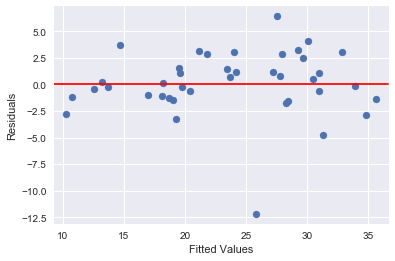

In [310]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data_all(d,80)
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 7","Replicate 1")

Experiment 7 Replicate 2
Model Coefficients w\Intercept: 
 [ 59.30271259] [[-4.75688268  1.68574492  1.75725476 -0.59086761  1.90475061  0.13171118
  -1.21666581 -0.4786218  -0.01670135 -2.18072946 -1.92383853 -3.50176014
  -3.26403451 -1.79344757 -1.97498389 -1.13745213  0.06730832  0.25928746
   2.09075526  5.41356274  3.34010948  4.60522295 -1.03215424  0.07634105
   0.95581319]] 

Validate
Coefficient of Determination: 0.87
Mean squared error: 6.15

Test
Coefficient of Determination: 0.88
Mean squared error: 9.59


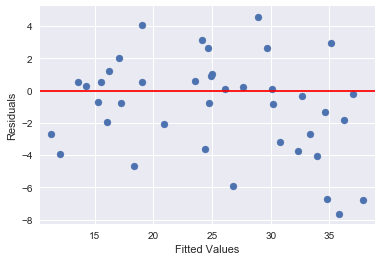

In [311]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data_all(d,80)
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 7","Replicate 2")

Experiment 7 Replicate 3
Model Coefficients w\Intercept: 
 [ 64.48302976] [[-6.35731543  1.05761149  1.42409632  0.16641429  3.70919333 -0.33241915
  -1.03131073 -0.46387394 -0.13881867 -2.93548666 -1.81213413 -3.17597398
  -3.31055945 -1.85831074 -1.41136323 -1.44042421 -0.24660685  0.33913907
   2.19050327  5.62260396  3.43596355  4.60264941 -0.84499044  0.06759453
   0.77739591]] 

Validate
Coefficient of Determination: 0.84
Mean squared error: 8.81

Test
Coefficient of Determination: 0.83
Mean squared error: 9.42


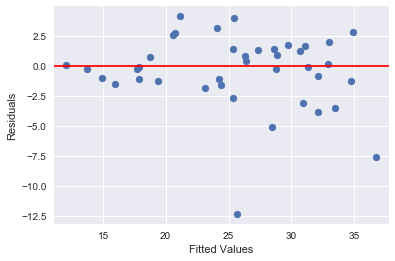

In [312]:
X_train, Y_train, X_validate, Y_validate, X_test, Y_test = prep_data_all(d,80)
my_lr(X_train,Y_train,X_validate,Y_validate,X_test,Y_test,"Experiment 7","Replicate 3")

We consistently got better r-squared values with the extra variables included.  Therefore, it appears that those columns contained important data that accounts for some of the variation in the model.

## Conclusion
It appears based on these experiments that an R-squared of around .85 - .70 is about as good as we are going to get no matter what transformations we apply or how we split the dataset. Generally we see only small differences between replicates and experiments, but not enough to be concerned. It is likely that if we want to improve the performance of a learning algorithm, we may need to use a different algorithm that takes into account the non-linear relationship of the data. Adding the categorical variables definitely improved the model.